# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [160]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv','\t')
print(data.head())
print(data.info())


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

### Вывод

В данных есть пропуски. Есть в столбце с потолками выбивающиеся данные с очень низкими и высокими потолками. locality_name заполнены все коректо. Нет проблем с регистором в написании. Чтобы открыть файл нужно было поставить разделитель '\t'

### Шаг 2. Предобработка данных

In [161]:
print(data['balcony'].count())
print(data['balcony'].isnull().sum())
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].count())
print(data['balcony'].isnull().sum())
data['balcony'] = data['balcony'].astype('int')
#print(data.info())

print(data.duplicated().sum())
print(data['floors_total'].count())
print(data['floors_total'].isnull().sum())
data.dropna(subset = ['floors_total'], inplace =True)
#print(data['floors_total'].value_counts())
print(data['floors_total'].count())
print(data['floors_total'].isnull().sum())



12180
11519
23699
0
0
23613
86
23613
0


В столбце balcony есть пропуски, можно предроложить - что люди не писали балконыБ если их нет.
В столбце floors_total есть пропуски, так как их небольшое количество эти строки можно удалить.

### Шаг 3. Посчитайте и добавьте в таблицу

In [162]:
data['price_square_meter']=data['last_price']/data['total_area']
import datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_new'] = data.apply(lambda _: '', axis=1)

def floor(row):
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
             return 'другое'

data['floors_new'] = data.apply(floor, axis=1)


data['ratio_total_living_area']=data['total_area']/data['living_area']
data['ratio_total_kitchen_area']=data['total_area']/data['kitchen_area']

print(data.head())
print(data.info())


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0  

Расчитала и добавила в таблицу:
цену квадратного метра
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<function matplotlib.pyplot.show(*args, **kw)>

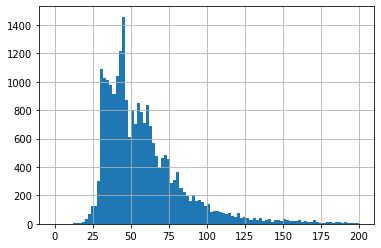

In [163]:
import matplotlib.pyplot as plt
data['total_area'].hist(bins=100, range=(0,200))
plt.show
#Гистограма площади

Построила гистограмму площади. Есть длинный хвост.

<function matplotlib.pyplot.show(*args, **kw)>

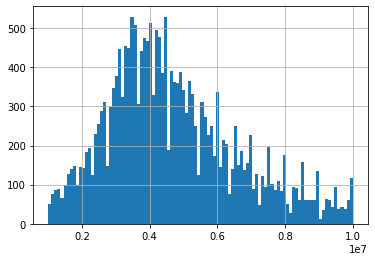

In [164]:
data['last_price'].hist(range =(10**6,  10**7), bins = 100)
plt.show
#Гистограма цены

Построила гистограмму цены

<function matplotlib.pyplot.show(*args, **kw)>

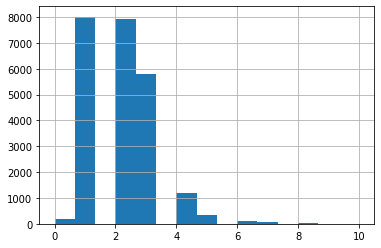

In [165]:
data['rooms'].hist(bins=15, range=(0,10))
plt.show
#Гистограма от кол-ва комнат

Построила гистограмму от кол-ва комнат. Брала значения только до 10 комнат.

<function matplotlib.pyplot.show(*args, **kw)>

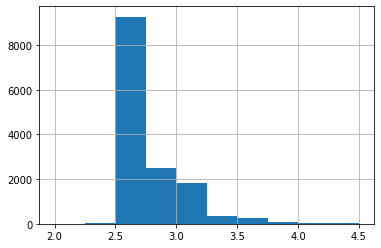

In [166]:
data['ceiling_height'].hist(bins=10, range=(2,4.5))
plt.show
#Гистограма от высоты потолков

In [ ]:
Построила гистограмму от высоты потолков. Расматривала только от 2 и до 4,5 метров.

Медиана равна 95.0
Среднее равно 180.88483929357665


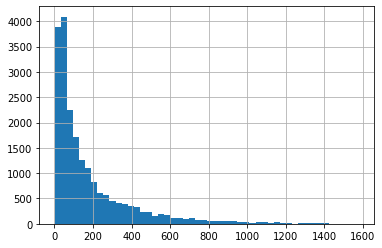

In [167]:
data['days_exposition'].hist(bins=50)
plt.show
print('Медиана равна',data['days_exposition'].median())
print('Среднее равно',data['days_exposition'].mean())
#Гистограма от времени продажи квартиры. Медиана и среднее значчение

Построила гистограму от времени продажи квартиры. Медиана и среднее значчение

                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.206213 -0.184750   -0.230872
last_price                     -0.206213    1.000000  0.363124    0.653581
rooms                          -0.184750    0.363124  1.000000    0.758324
total_area                     -0.230872    0.653581  0.758324    1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec04265350>,
      dtype=object)

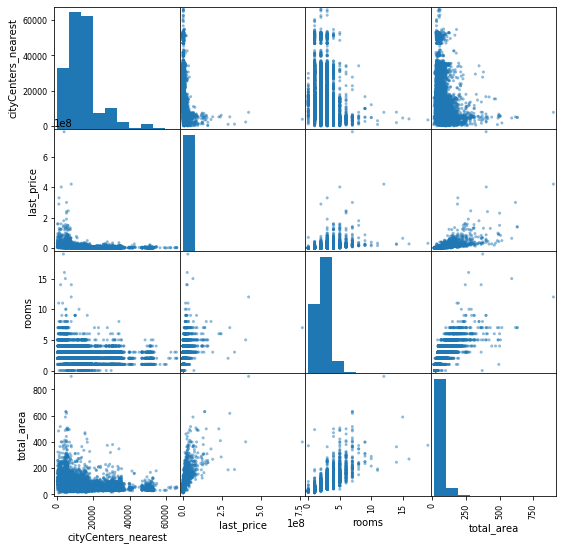

In [168]:
import matplotlib.pyplot as plt

for row in data:
    data['id_row'] = data.index

corr_last_price = data.pivot_table(index='id_row', values=['total_area','rooms', 'cityCenters_nearest','last_price'], aggfunc='mean')
print(corr_last_price.corr())
pd.plotting.scatter_matrix(corr_last_price, figsize=(9, 9))
# зависимость цены от квадратного метра, числа комнат, удалённости от центра

Построила зависимость цены от квадратного метра, числа комнат, удалённости от центра. Больше всего цена зависит от площади. Потом от кол-ва комнат, далее только от растояния до центра

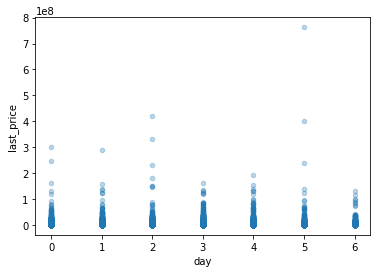

In [169]:
data['day'] = data['first_day_exposition'].dt.dayofweek
data.plot(x='day', y='last_price', kind='scatter', alpha=0.3)
plt.show()
# Зависимость от даты размещения: дня недели, месяца и года

Посчитайте и добавьте в таблицу: день недели, месяц и год публикации объявления;
Построила зависимость от даты размещения: дня недели, месяца и года
Чаще всего покупают квартиры в пятницу и среду

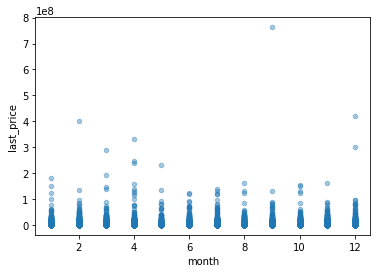

In [170]:
data['month'] = data['first_day_exposition'].dt.month
data.plot(x='month', y='last_price', kind='scatter', alpha=0.4)
plt.show()

Хуже покупают квартиры летом

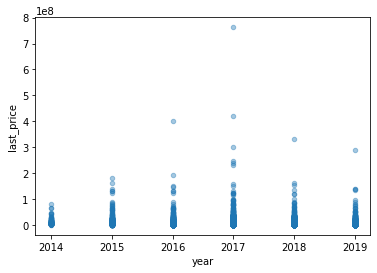

In [171]:
data['year'] = data['first_day_exposition'].dt.year
data.plot(x='year', y='last_price', kind='scatter', alpha=0.4)
plt.show()

В 2017 недвижимость покупалась хорошо. А вот в 2014 наверно сказался кризис

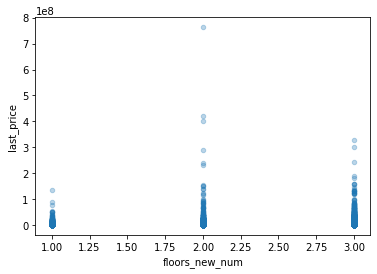

In [172]:
def floor(row):
        if row['floor'] == 1:
            return 1
        elif row['floor'] == row['floors_total']:
            return 2
        else:
             return 3

data['floors_new_num'] = data.apply(floor, axis=1)

data.plot(x='floors_new_num', y='last_price', kind='scatter', alpha=0.3)
plt.show()
# зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

Построила зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Квартиры на первом этаже покупаются хуже всего. На последнем этаже люди тоже не очень любят покупать. (Террасу из наших крыш не сделаешь :( )

In [198]:
import numpy as np
n = 10
most_frequent_values = data['locality_name'].value_counts()[:n].index.tolist()
print(most_frequent_values)
data_filtered = data[data['locality_name'].isin(most_frequent_values)]

data_locality_price_square_meter = pd.pivot_table(data_filtered, values=['price_square_meter'], index= ['locality_name'], aggfunc= {'price_square_meter': np.mean} )

print(data_locality_price_square_meter.sort_values(by = 'price_square_meter', ascending=False).head(10))

# 10 населённых пунктов с наибольшим числом объявлений. Средняя цену квадратного метра в этих населённых пунктах. 

['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']
                   price_square_meter
locality_name                        
Санкт-Петербург         114868.877341
Пушкин                  103125.819291
деревня Кудрово          92473.547576
посёлок Парголово        90175.913458
посёлок Мурино           85673.259928
посёлок Шушары           78551.344545
Колпино                  75424.579098
Гатчина                  68746.146763
Всеволожск               68654.473986
Выборг                   58141.909153


Я выделила 10 населённых пунктов с наибольшим числом объявлений. И посчитала средняя цену квадратного метра в этих населённых пунктах

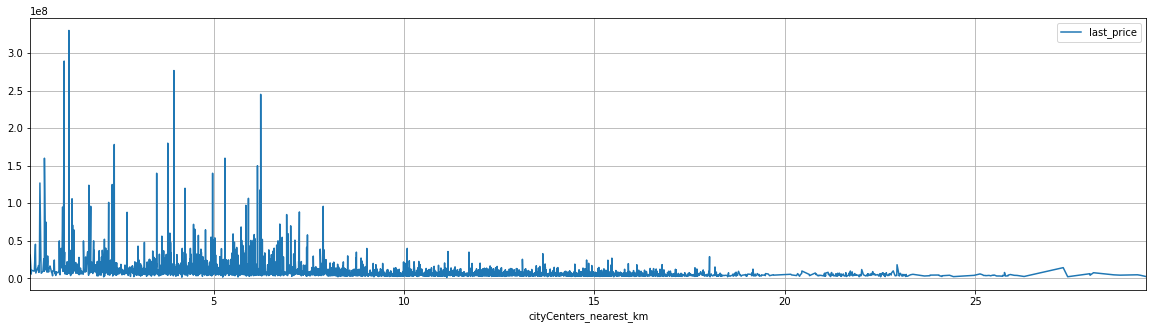

In [174]:
for row in data:
    data['cityCenters_nearest_km']=(data['cityCenters_nearest']/1000)
    data['cityCenters_nearest_km'].round(1)
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price',  aggfunc='mean').plot( grid=True, figsize=(20, 5))
plt.show()
# столбец с расстоянием до центра в километрах: окрулила до целых значений. Средняя цену для каждого километра. График:  как цена зависит от удалённости от центра. Определила границу, где график сильно меняется — это и будет центральная зона.

Столбец с расстоянием до центра в километрах: окрулила до целых значений. 
Средняя цену для каждого километра. 
График:  как цена зависит от удалённости от центра. 
Определила границу, где график сильно меняется — это и будет центральная зона. 

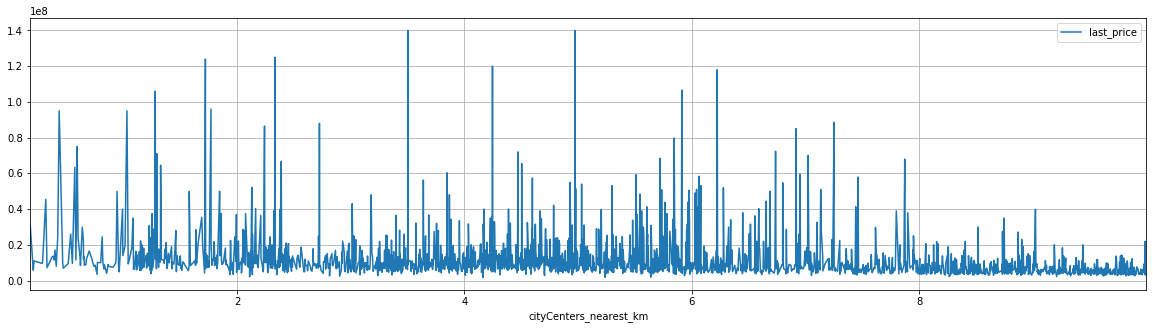

In [175]:
data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km < 10 and last_price < 150000000').pivot_table(index='cityCenters_nearest_km', values='last_price',  aggfunc='mean').plot( grid=True, figsize=(20, 5))
plt.show()

Увеличила график. Определила границу, где график сильно меняется — это и будет центральная зона. Примерно 8 км

In [176]:
data_center = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km < 8')

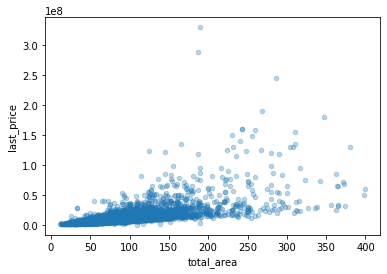

0.6535810085611219


In [177]:
data.query('locality_name == "Санкт-Петербург" and total_area < 400').plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print(data['last_price'].corr(data['total_area']))
# Зависимость от площади в Спб

Построила график: он  показывает, как площадь зависит от удалённости от цены в Санкт-Петербурге.

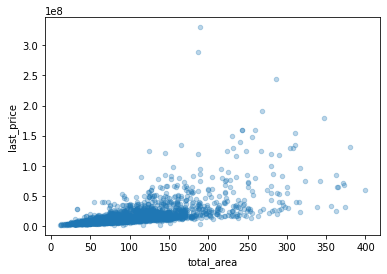

0.6365634251665995


In [178]:
data_center.query('total_area < 400').plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print(data_center['last_price'].corr(data['total_area']))
# Зависимость от площади в центре Спб (примерно одинаковая в обоих вариантах)

Построила график: он  показывает, как площадь зависит от удалённости от цены в центре Санкт-Петербурга. Зависимости примерно одинаковые.

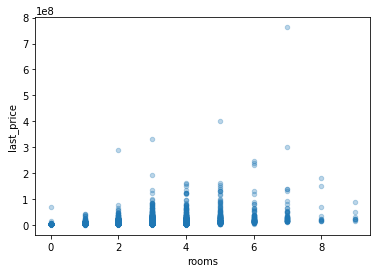

0.36312416659845514


In [179]:
data.query('locality_name == "Санкт-Петербург" and rooms < 10').plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print(data['last_price'].corr(data['rooms']))
# Зависимость от числа комнат в Спб

Построила график: он  показывает, как цена зависит от числа комнат Санкт-Петербурга.

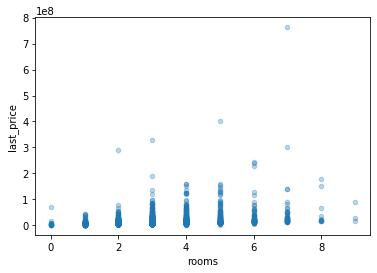

0.33329250377599595


In [180]:
data_center.query('rooms < 10').plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print(data_center['last_price'].corr(data['rooms']))


Построила график: он  показывает, как цена зависит от числа комнат в центре Санкт-Петербурга.

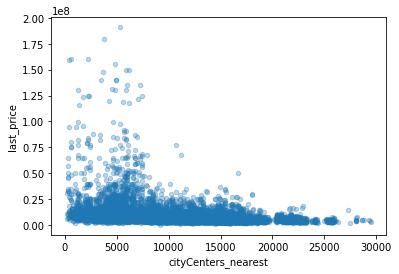

-0.20621265675129588


In [181]:
data.query('locality_name == "Санкт-Петербург" and last_price < 200000000').plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print(data['last_price'].corr(data['cityCenters_nearest']))
# Зависимость от растояние до центра в Спб

Построила график: он  показывает, как цена зависит от удаленности от центра в  Санкт-Петербурге.

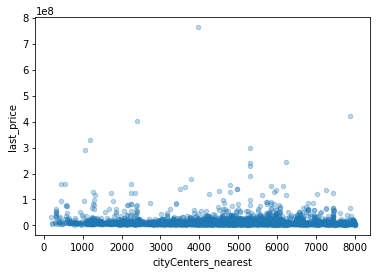

-0.04839463330812487


In [182]:
data_center.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)
plt.show()
print(data_center['last_price'].corr(data['cityCenters_nearest']))
# Зависимость от растояние до центра в центре Спб (мы же и так уже расматриваем квартиры в центре)

Построила график: он  показывает, как цена зависит от удаленности от центра в центре Санкт-Петербурге.(мы же и так уже расматриваем квартиры в центре)

In [183]:
print('Первый этаж ', data.query('locality_name == "Санкт-Петербург" ')[data['floors_new_num']==1]['last_price'].mean().round(1))
print('Другие этажи ',data.query('locality_name == "Санкт-Петербург" ')[data['floors_new_num']==2]['last_price'].mean().round(1))
print('Последний этаж ',data.query('locality_name == "Санкт-Петербург" ')[data['floors_new_num']==3]['last_price'].mean().round(1))
# Зависимость от этажа в Спб

Первый этаж  6178652.7
Другие этажи  10351731.4
Последний этаж  7955145.5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Средняя цена в Санкт-Петербурге

In [184]:
print('Первый этаж ', data_center[data_center['floors_new_num']==1]['last_price'].mean().round(1))
print('Другие этажи ',data_center[data_center['floors_new_num']==2]['last_price'].mean().round(1))
print('Последний этаж ',data_center[data_center['floors_new_num']==3]['last_price'].mean().round(1))
# Зависимость от этажа в центре Спб

Первый этаж  9167232.8
Другие этажи  18814409.7
Последний этаж  14568343.2


Средняя цена в центре Санкт-Петербурга

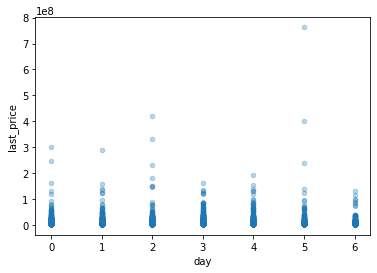

In [185]:
data.query('locality_name == "Санкт-Петербург" ').plot(x='day', y='last_price', kind='scatter', alpha=0.3)
plt.show()
# Зависимость от дня недели в Спб

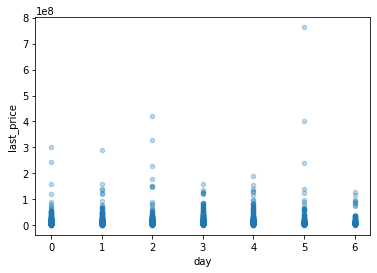

In [186]:
data_center.plot(x='day', y='last_price', kind='scatter', alpha=0.3)
plt.show()
# Зависимость от дня недели в центре Спб

От дня недели центр от всего Санкт-Петербурга не отличает. Квартиры продаются по тем же дням.

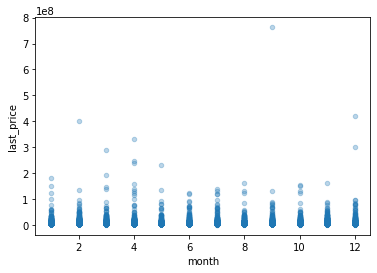

In [187]:
data.query('locality_name == "Санкт-Петербург" ').plot(x='month', y='last_price', kind='scatter', alpha=0.3)
plt.show()
# Зависимость от дня месяца в Спб

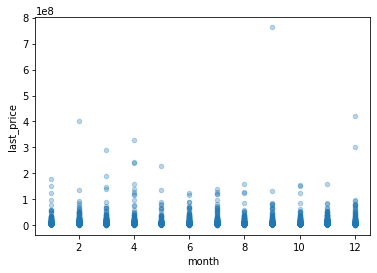

In [188]:
data_center.plot(x='month', y='last_price', kind='scatter', alpha=0.3)
plt.show()
# Зависимость от дня месяца в центре Спб

От месяца продажи центр от всего Санкт-Петербурга не отличает. Квартиры продаются хуже летом.

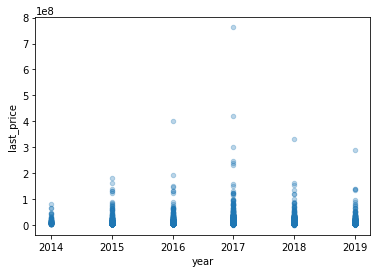

In [189]:
data.query('locality_name == "Санкт-Петербург" ').plot(x='year', y='last_price', kind='scatter', alpha=0.3)
plt.show()
# Зависимость от дня года в Спб

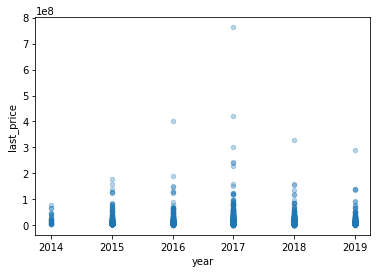

In [190]:
data_center.plot(x='year', y='last_price', kind='scatter', alpha=0.3)
plt.show()
# Зависимость от дня года в центре Спб

От года продажи центр от всего Санкт-Петербурга не отличает. Квартиры продавались лучше в 2017 и хуже в 2014 годах

### Шаг 5. Общий вывод

Квартиры в больших городах стоят дороже. Чем больше площадь квартира дороже. Чем больше комнат квартира дороже. Есть зависимость до центра города. Люди не любят покупать ни первые и ни последние этажи. Люди одинаково покупают 1комнатные 2 комнатные. Хуже 3 комнатные и так далее. Чаще всего квартиры 30 - 60 кв м. Цетром  Санкт-Петербурга считается до 8 км до центра.